In [127]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
from random import randint
import sys

In [82]:
sys.path.append("../")

In [83]:
from traffic_simulator.model import Location, Road, Trip

# Generate Static Trips

In [84]:
number_of_nodes = 5

locations = []

for i in range(0, number_of_nodes):
    locations.append(Location(name=str(i)))
    
locations

[Location(name='0'),
 Location(name='1'),
 Location(name='2'),
 Location(name='3'),
 Location(name='4')]

In [114]:
graph = \
{
    "nodes": [],
}

links = [{"source": "0", "target": "1", "distance": 0.4},
         {"source": "0", "target": "4", "distance": 1.0},
         {"source": "1", "target": "3", "distance": 0.8},
         {"source": "4", "target": "2", "distance": 0.1},
         {"source": "3", "target": "4", "distance": 0.7}]
graph["links"] = links
graph

{'nodes': [],
 'links': [{'source': '0', 'target': '1', 'distance': 0.4},
  {'source': '0', 'target': '4', 'distance': 1.0},
  {'source': '1', 'target': '3', 'distance': 0.8},
  {'source': '4', 'target': '2', 'distance': 0.1},
  {'source': '3', 'target': '4', 'distance': 0.7}]}

In [115]:
nodes = []

for location in locations:
    nodes.append({"id": location.name, "uid": str(location.uid)})

graph["nodes"] = nodes
graph

{'nodes': [{'id': '0', 'uid': 'c5814c6f-aae7-4c31-9360-3bdc7096dbc4'},
  {'id': '1', 'uid': 'e4c0e524-2719-4150-a99e-6c0a47291f75'},
  {'id': '2', 'uid': '677620df-8327-4ef8-a4c3-263582c918b0'},
  {'id': '3', 'uid': '606309ff-31b0-478d-acb1-3a4316893b1b'},
  {'id': '4', 'uid': '74e2c2e9-d545-408a-9c46-75ba41e7f610'}],
 'links': [{'source': '0', 'target': '1', 'distance': 0.4},
  {'source': '0', 'target': '4', 'distance': 1.0},
  {'source': '1', 'target': '3', 'distance': 0.8},
  {'source': '4', 'target': '2', 'distance': 0.1},
  {'source': '3', 'target': '4', 'distance': 0.7}]}

In [116]:
def load_graph(graph: str):
    return json_graph.node_link_graph(graph, directed=False)

In [117]:
graph

{'nodes': [{'id': '0', 'uid': 'c5814c6f-aae7-4c31-9360-3bdc7096dbc4'},
  {'id': '1', 'uid': 'e4c0e524-2719-4150-a99e-6c0a47291f75'},
  {'id': '2', 'uid': '677620df-8327-4ef8-a4c3-263582c918b0'},
  {'id': '3', 'uid': '606309ff-31b0-478d-acb1-3a4316893b1b'},
  {'id': '4', 'uid': '74e2c2e9-d545-408a-9c46-75ba41e7f610'}],
 'links': [{'source': '0', 'target': '1', 'distance': 0.4},
  {'source': '0', 'target': '4', 'distance': 1.0},
  {'source': '1', 'target': '3', 'distance': 0.8},
  {'source': '4', 'target': '2', 'distance': 0.1},
  {'source': '3', 'target': '4', 'distance': 0.7}]}

In [118]:
light_blue = "#87CEEB"
node_colors = []

for color in range(0, number_of_nodes):
    node_colors.append(light_blue)

In [119]:
G = load_graph(graph)

In [120]:
link_labels = {(x, y): d["distance"] for x, y, d in G.edges(data=True)}
link_labels

{('0', '1'): 0.4,
 ('0', '4'): 1.0,
 ('1', '3'): 0.8,
 ('2', '4'): 0.1,
 ('3', '4'): 0.7}

<module 'matplotlib.pyplot' from '/Users/facts/mambaforge/envs/traffic_simulator/lib/python3.9/site-packages/matplotlib/pyplot.py'>

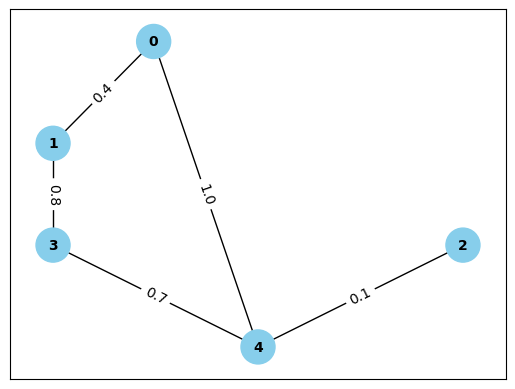

In [121]:
pos = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=pos, node_color=node_colors, node_size=600, node_shape='o', with_labels=False)
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=link_labels, font_size=10)
plt

In [122]:
print("Node degree and node cluster")
H = nx.Graph(G)

for node in nx.nodes(H):
    print(f"{node} {nx.degree(H, node)} {round(nx.clustering(H, node))})")

Node degree and node cluster
0 2 0)
1 2 0)
2 1 0)
3 2 0)
4 3 0)


In [123]:
print("Adjency List")

for line in nx.generate_adjlist(H):
    print(line)

Adjency List
0 1 4
1 3
2 4
3 4
4


# Generate Random Trips

In [230]:
seed = 1000           # seed the graph for reproducibility, you should be doing this once you generate a connected graph
G = nx.gnp_random_graph (60, .05, seed=seed) # uncomment this and the above line once you have a connected graph.

In [231]:
for u, v in G.edges:
  G.add_edge(u, v, weight=randint(5,25))

In [232]:
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

In [233]:
light_blue = "#87CEEB"
node_colors = []

for color in range(0, len(G.nodes)):
    node_colors.append(light_blue)

<module 'matplotlib.pyplot' from '/Users/facts/mambaforge/envs/traffic_simulator/lib/python3.9/site-packages/matplotlib/pyplot.py'>

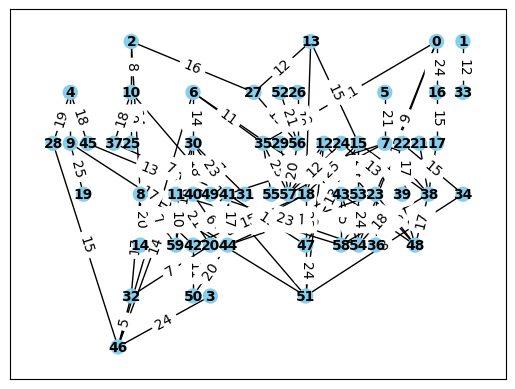

In [234]:
pos = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=pos, node_color=node_colors, node_size=100, node_shape='o', with_labels=False)
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt

In [209]:
print(f"Length of edges {len(G.edges)}")

Length of edges 92


In [202]:
print("Node degree and node cluster")

for node in nx.nodes(G):
    print(f"{node} {nx.degree(H, node)} {round(nx.clustering(H, node))})")

Node degree and node cluster
0 4 0)
1 1 0)
2 3 0)
3 1 0)
4 3 0)
5 1 0)
6 4 0)
7 6 0)
8 6 0)
9 3 0)
10 4 0)
11 3 0)
12 4 0)
13 3 0)
14 1 0)
15 5 0)
16 2 0)
17 2 0)
18 6 0)
19 1 0)
20 3 0)
21 1 0)
22 2 0)
23 5 0)
24 2 0)
25 1 0)
26 1 0)
27 3 0)
28 2 0)
29 1 0)
30 6 0)
31 1 0)
32 3 0)
33 1 0)
34 2 0)
35 4 0)
36 1 0)
37 2 0)
38 6 0)
39 4 0)
40 2 0)
41 5 0)
42 3 0)
43 3 0)
44 6 0)
45 2 0)
46 5 0)
47 4 0)
48 5 0)
49 2 0)
50 2 0)
51 5 0)
52 1 0)
53 2 0)
54 5 0)
55 1 0)
56 4 0)
57 6 0)
58 4 0)
59 3 0)


In [203]:
print("Adjency List")

for line in nx.generate_adjlist(H):
    print(line)

Adjency List
0 16 23 35 54
1 33
2 8 10 27
3 46
4 9 28 45
5 7
6 30 35 46 48
7 38 39 41 48 57
8 14 32 42 51 59
9 19 44
10 25 37 51
11 20 58 59
12 18 48 51 57
13 15 18 27
14
15 18 38 47 53
16 17
17 38
18 20 42 47
19
20 32
21 38
22 34 39
23 36 44 48 58
24 39 57
25
26 56
27 56
28 46
29 57
30 31 40 41 46 59
31
32 46
33
34 51
35 55 57
36
37 41
38 48 58
39 54
40 44
41 44 47
42 50
43 44 54 58
44 50
45 49
46
47 51
48
49 54
50
51
52 56
53 54
54
55
56 57
57
58
59
